In [10]:
import torch
import math
 
import timm
from fastai.vision.all import *

if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    print("Found mps")
    default_device(torch.device("mps"))
else:
    print("Using cpu")
    default_device(torch.device("mps"))

Using cpu


In [11]:
path = untar_data(URLs.MNIST)
print(path)

/Users/gwilliams/.fastai/data/mnist_png


In [12]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label)
#        batch_tfms=aug_transforms(mult=2., do_flip=False))

In [13]:
loaders = block.dataloaders(path/"training")

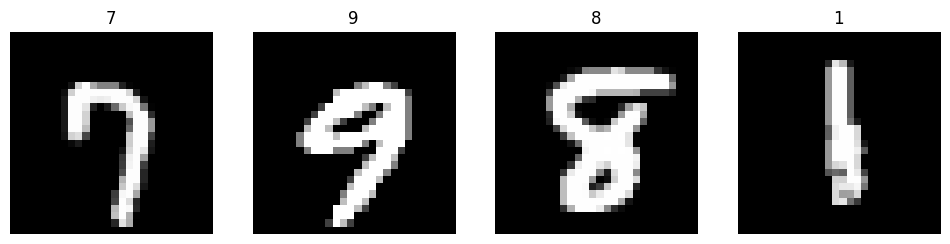

In [14]:
loaders.train.show_batch(max_n=4, nrows=1)

In [15]:
# squeezenet default fast ai learner
learn = vision_learner(loaders, squeezenet1_0, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)


/Users/gwilliams/Projects/SEEMAP2023/venv/seemap2023/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gwilliams/Projects/SEEMAP2023/venv/seemap2023/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 96 x 11 x 11   
Conv2d                                    14208      False     
ReLU                                                           
____________________________________________________________________________
                     64 x 96 x 5 x 5     
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 5 x 5     
Conv2d                                    1552       False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 5 x 5     
Conv2d                                    1088       False     
ReLU                                                           
Conv2d                                    9280

In [ ]:
learn.fit_one_cycle(1)